In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/telco_churn.csv') # Убедись, что путь правильный

print("Размер датасета:", df.shape)
print("\nПервые 5 строк:")
df.head()

Размер датасета: (7043, 21)

Первые 5 строк:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Смотрим общую информацию о данных
Визуализируем распределение оттока

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

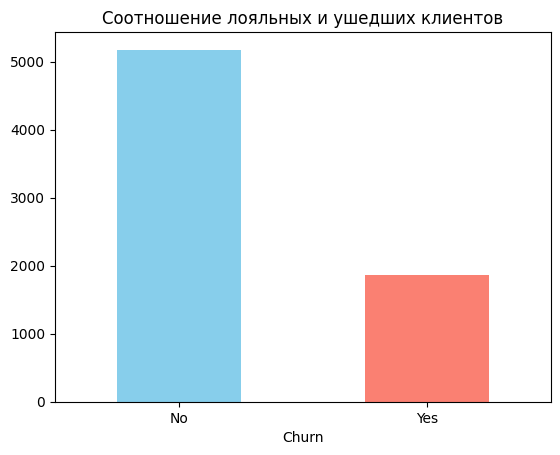

In [18]:
print("Информация о данных:")
df.info()

print("\nРаспределение оттока:")
print(df['Churn'].value_counts())

plt.title('Соотношение лояльных и ушедших клиентов')
df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks(rotation=0)
plt.show()

Преоразовываем TotalCharges в числа, ошибки в NaN

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("Пропуски в TotalCharges после преобразования:")
print(df['TotalCharges'].isnull().sum())

df[df['TotalCharges'].isnull()].head()

Пропуски в TotalCharges после преобразования:
11


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No


Строим красивую таблицу для анализа влияния типа контракта на отток

In [20]:
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn = contract_churn.round(2)
contract_churn

Churn,No,Yes
Contract,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83


Заменяем Nan в TotalCharges на 0 (логика - новый клиент, еще не платил)

In [21]:
print("Количество пропусков в TotalCharges до обработки:")
print(df['TotalCharges'].isnull().sum())

df['TotalCharges'].fillna(0, inplace=True)

print("Количество пропусков в TotalCharges после обработки:")
print(df['TotalCharges'].isnull().sum())

print("\nТип данных TotalCharges:")
print(df['TotalCharges'].dtype)

Количество пропусков в TotalCharges до обработки:
11
Количество пропусков в TotalCharges после обработки:
0

Тип данных TotalCharges:
float64


C:\Users\maksi\AppData\Local\Temp\ipykernel_4044\3225237250.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


Список всех категориальных колонок

In [22]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Категориальные колонки:")
print(categorical_columns)

Категориальные колонки:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Чистим ненужные для модели колонки

In [23]:
cols_to_remove = ['customerID', 'Churn']
categorical_columns = [col for col in categorical_columns if col not in cols_to_remove]

print("\nКатегориальные колонки для кодирования:")
print(categorical_columns)


Категориальные колонки для кодирования:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


Считаем уникальные значения для каждой категориальной колонки

In [24]:
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"\n{column}: {unique_values} (Кол-во: {len(unique_values)})")


gender: ['Female' 'Male'] (Кол-во: 2)

Partner: ['Yes' 'No'] (Кол-во: 2)

Dependents: ['No' 'Yes'] (Кол-во: 2)

PhoneService: ['No' 'Yes'] (Кол-во: 2)

MultipleLines: ['No phone service' 'No' 'Yes'] (Кол-во: 3)

InternetService: ['DSL' 'Fiber optic' 'No'] (Кол-во: 3)

OnlineSecurity: ['No' 'Yes' 'No internet service'] (Кол-во: 3)

OnlineBackup: ['Yes' 'No' 'No internet service'] (Кол-во: 3)

DeviceProtection: ['No' 'Yes' 'No internet service'] (Кол-во: 3)

TechSupport: ['No' 'Yes' 'No internet service'] (Кол-во: 3)

StreamingTV: ['No' 'Yes' 'No internet service'] (Кол-во: 3)

StreamingMovies: ['No' 'Yes' 'No internet service'] (Кол-во: 3)

Contract: ['Month-to-month' 'One year' 'Two year'] (Кол-во: 3)

PaperlessBilling: ['Yes' 'No'] (Кол-во: 2)

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] (Кол-во: 4)


Кодируем категориальные признаки:
Для двух уникальных значений используем Label Encoding 
Для >2 уникальных значений используем One-Hot Encoding OHE

In [25]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

binary_columns = [col for col in categorical_columns if df[col].nunique() == 2]
print("Бинарные колонки для Label Encoding:")
print(binary_columns)

le = LabelEncoder()
for col in binary_columns:
    df_encoded[col] = le.fit_transform(df[col])
    print(f"Закодирована колонка {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

ohe_columns = [col for col in categorical_columns if df[col].nunique() > 2]
print("\nКолонки для One-Hot Encoding:")
print(ohe_columns)

df_encoded = pd.get_dummies(df_encoded, columns=ohe_columns, drop_first=False, dtype=int)

df_encoded['Churn'] = le.fit_transform(df['Churn'])  # No -> 0, Yes -> 1

print(f"\nРазмер датафрейма после кодирования: {df_encoded.shape}")
print("\nПервые 3 строки после кодирования:")
df_encoded.head(3)

Бинарные колонки для Label Encoding:
['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
Закодирована колонка gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Закодирована колонка Partner: {'No': np.int64(0), 'Yes': np.int64(1)}
Закодирована колонка Dependents: {'No': np.int64(0), 'Yes': np.int64(1)}
Закодирована колонка PhoneService: {'No': np.int64(0), 'Yes': np.int64(1)}
Закодирована колонка PaperlessBilling: {'No': np.int64(0), 'Yes': np.int64(1)}

Колонки для One-Hot Encoding:
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

Размер датафрейма после кодирования: (7043, 42)

Первые 3 строки после кодирования:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1


Выделяем целевую переменную, выделяем признаки.

In [26]:
y = df_encoded['Churn']

X = df_encoded.drop('Churn', axis=1)  

print(f"Размерность матрицы признаков (X): {X.shape}")
print(f"Размерность целевого вектора (y): {y.shape}")

Размерность матрицы признаков (X): (7043, 41)
Размерность целевого вектора (y): (7043,)


Импортируем функцию train_test_split для разделения данных
Разделяем данные 1 к 5 на тестовую и тренировочную выборку

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Обучающая выборка (X_train): {X_train.shape}")
print(f"Тестовая выборка (X_test): {X_test.shape}")
print(f"Обучающие ответы (y_train): {y_train.shape}")
print(f"Тестовые ответы (y_test): {y_test.shape}")

print("\nРаспределение классов в y_train:")
print(y_train.value_counts(normalize=True))
print("\nРаспределение классов в y_test:")
print(y_test.value_counts(normalize=True))

Обучающая выборка (X_train): (5634, 41)
Тестовая выборка (X_test): (1409, 41)
Обучающие ответы (y_train): (5634,)
Тестовые ответы (y_test): (1409,)

Распределение классов в y_train:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Распределение классов в y_test:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


Очищаем выборки от ненужной колонки customerID

In [28]:
X_train = X_train.drop('customerID', axis=1)

X_test = X_test.drop('customerID', axis=1)

print(f"Размерность X_train после удаления customerID: {X_train.shape}")
print(f"Размерность X_test после удаления customerID: {X_test.shape}")

Размерность X_train после удаления customerID: (5634, 40)
Размерность X_test после удаления customerID: (1409, 40)


Импортируем и создаем объект StandartScaler.
Обучаем scaler на тренировочных данных и преобразуем тестовые данные
Тем самым проводим нормализацию данных, чтобы все признаки были в одном масштабе

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nСредние значения признаков (должны быть близки к 0):")
print(X_train.mean().head())

print("\nСтандартные отклонения (должны быть близки к 1):")
print(X_train.std().head())


Средние значения признаков (должны быть близки к 0):
gender           1.135052e-16
SeniorCitizen    7.440898e-17
Partner         -7.031018e-17
Dependents       2.900689e-17
tenure          -1.008935e-17
dtype: float64

Стандартные отклонения (должны быть близки к 1):
gender           1.000089
SeniorCitizen    1.000089
Partner          1.000089
Dependents       1.000089
tenure           1.000089
dtype: float64


Импортируем модель логистической регрессии, создаем ее эксземпляр. Обучаем модель на тренировочных данных, делаем предсказание на тестовых. Оцениваем точность с помощью accuracy_score и смотрим другие метрики с помощью classification_report

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность (Accuracy) модели на тестовых данных: {accuracy:.4f}")

from sklearn.metrics import classification_report

print("\nПолный отчет по метрикам классификации:")
print(classification_report(y_test, y_pred))

Точность (Accuracy) модели на тестовых данных: 0.8070

Полный отчет по метрикам классификации:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



Создаем модель логистической регрессии со взвешиванием классов. class_weight='balanced' автоматически присвоит бОльший вес классу 1 (ушедшие)

In [31]:
model_balanced = LogisticRegression(random_state=42, class_weight='balanced')

model_balanced.fit(X_train, y_train)

y_pred_balanced = model_balanced.predict(X_test)

print("Отчет для модели со взвешиванием классов:")
print(classification_report(y_test, y_pred_balanced))

Отчет для модели со взвешиванием классов:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



Проверяем и оцениваем по f1-score другие модели на данной задаче.

Logistic Regression (Balanced): F1-score = 0.6322 (+/- 0.0518)
Random Forest: F1-score = 0.5326 (+/- 0.0523)
XGBoost: F1-score = 0.5924 (+/- 0.0267)


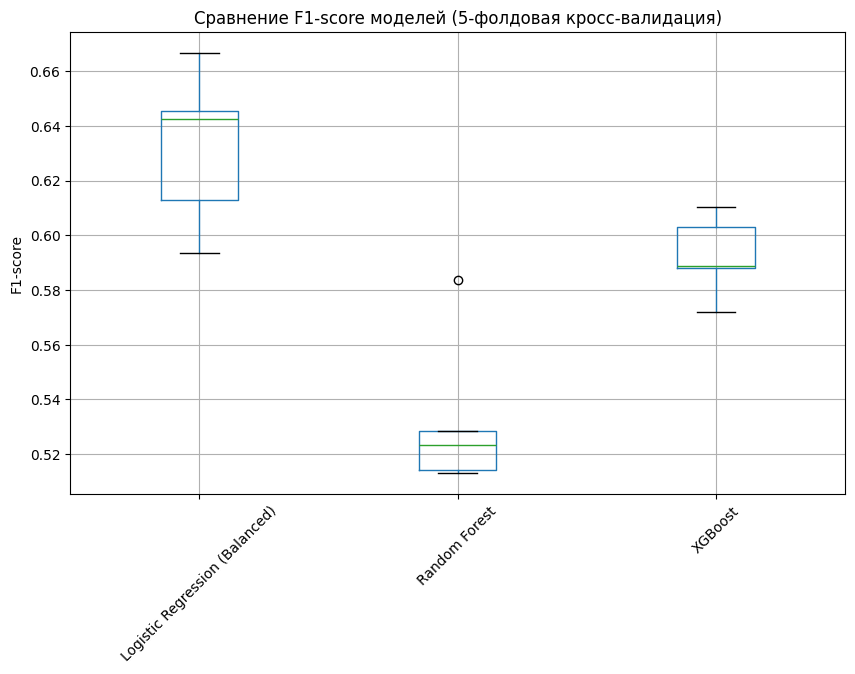

In [32]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    "Logistic Regression (Balanced)": LogisticRegression(random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(random_state=42, scale_pos_weight=(len(y_train)/sum(y_train))) 
}

results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1') 
    results[name] = cv_scores
    print(f"{name}: F1-score = {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

results_df = pd.DataFrame(results)
results_df.boxplot(figsize=(10, 6))
plt.title("Сравнение F1-score моделей (5-фолдовая кросс-валидация)")
plt.ylabel("F1-score")
plt.xticks(rotation=45)
plt.show()

Модель логистической регрессии оказалась лучшей. Далее подберем гиперпараметры с помощью GridSearchCV для большей точности этой модели.

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(
    LogisticRegression(random_state=42, class_weight='balanced'),
    param_grid,
    cv=5,  
    scoring='f1', 
    n_jobs=-1 
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший F1-score на кросс-валидации:", grid_search.best_score_)

best_lr_model = grid_search.best_estimator_

Лучшие параметры: {'C': 1, 'solver': 'liblinear'}
Лучший F1-score на кросс-валидации: 0.6323958264603435


Используем лучшую модель, найденную GridSearchCV и делаем финальные предикты на тестовых данных. Смотрим полный отчет классификации и визуализируе матрицу ошибок.

ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ НА ТЕСТОВЫХ ДАННЫХ:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



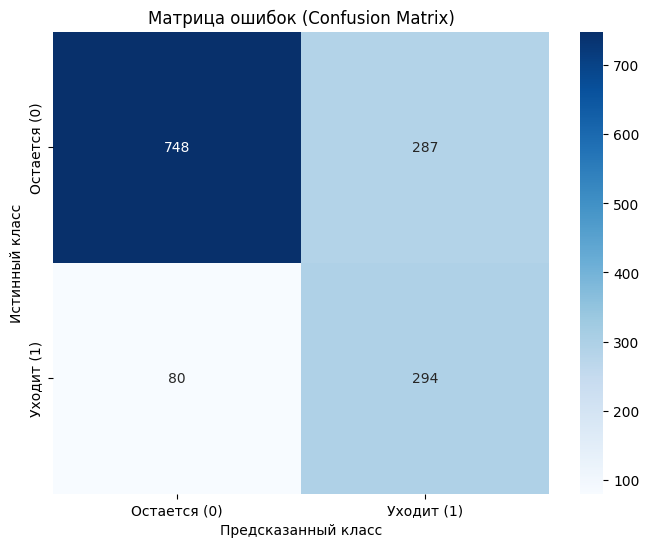

In [34]:
best_model = grid_search.best_estimator_

y_test_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ НА ТЕСТОВЫХ ДАННЫХ:")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Остается (0)', 'Уходит (1)'], 
            yticklabels=['Остается (0)', 'Уходит (1)'])
plt.title('Матрица ошибок (Confusion Matrix)')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

Оцениваем важность признаков и сортируем.

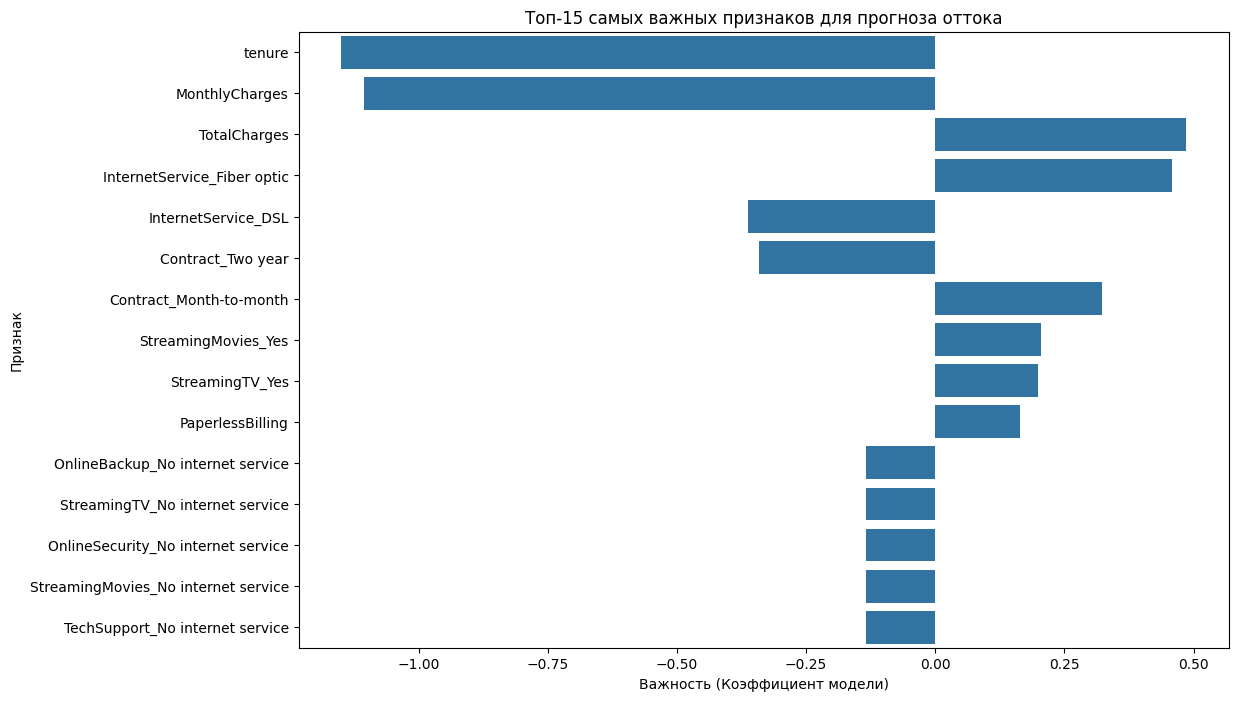

Топ-10 самых важных признаков:
                        feature  importance
4                        tenure   -1.150734
7                MonthlyCharges   -1.105969
8                  TotalCharges    0.485746
13  InternetService_Fiber optic    0.458640
12          InternetService_DSL   -0.363429
35            Contract_Two year   -0.341219
33      Contract_Month-to-month    0.321732
32          StreamingMovies_Yes    0.205099
29              StreamingTV_Yes    0.198880
6              PaperlessBilling    0.164420


In [35]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.coef_[0]  
})

feature_importance['abs_importance'] = abs(feature_importance['importance'])
feature_importance = feature_importance.sort_values('abs_importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Топ-15 самых важных признаков для прогноза оттока')
plt.xlabel('Важность (Коэффициент модели)')
plt.ylabel('Признак')
plt.show()

print("Топ-10 самых важных признаков:")
print(feature_importance[['feature', 'importance']].head(10))

In [36]:
import joblib
import json

# 1. Сохраняем обученную модель
joblib.dump(best_model, 'best_churn_model.pkl')

# 2. Сохраняем scaler (важно для новых данных)
joblib.dump(scaler, 'scaler.pkl')

# 3. Сохраняем список фичей (для воспроизводимости)
with open('feature_list.json', 'w') as f:
    json.dump(list(X_train.columns), f)

# 4. Сохраняем топ-10 фичей для визуализации
top_features = feature_importance[['feature', 'importance']].head(10).to_dict()
with open('top_features.json', 'w') as f:
    json.dump(top_features, f)

print("✅ Все артефакты сохранены!")

✅ Все артефакты сохранены!
